# Data Structures and Indexing

Pandas provides high-performance containers for tabular data,
and methods for operating on that data. We'll get our first look
at pandas' data structures. Then we'll focus on indexing, selecting subsets of data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows = 10 # display maximally 10 rows in jupyter
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

## Reading Data

You can create a `pd.Series` or `pd.DataFrame` directly from lists or dictionaries,
but most of the time you'll be reading from an external data source. Pandas can read
from many formats, including including

- `pd.read_parquet`
- `pd.read_csv`
- `pd.read_excel`
- `pd.read_html`
- `pd.read_json`
- `pd.read_hdf`
- `pd.read_sql`

For this section we'll work with some flights data from the US Bureau of Transportation and Statistics.
The file includes all the flights from New York airports in January 2014.
Each record has information about a single flight including the carrier, tail number, origin, destination, and delays.

Apache Parquet is a columnar storage format available to any project in the Hadoop ecosystem, regardless of the choice of data processing framework, data model or programming language. See https://parquet.apache.org/

In [4]:
flights = pd.read_parquet("data/ny-flights.parq")
flights

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01,AA,19805,N327AA,21,JFK,LAX,"1,902.00",2.00,"2,224.00",9.00,0.00,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01,AA,19805,N3EHAA,29,LGA,PBI,722.00,-8.00,"1,014.00",-26.00,0.00,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01,AA,19805,N319AA,117,JFK,LAX,"1,347.00",2.00,"1,706.00",1.00,0.00,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31,UA,19977,N54711,1253,ROC,ORD,801.00,-4.00,908.00,4.00,0.00,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31,UA,19977,N77525,1429,LGA,CLE,"1,522.00",-10.00,"1,649.00",-31.00,0.00,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31,UA,19977,N37293,1456,LGA,IAH,719.00,-6.00,"1,006.00",-20.00,0.00,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31,UA,19977,N24729,1457,LGA,IAH,852.00,7.00,"1,156.00",-6.00,0.00,2014-01-31 11:56:00,2014-01-31 08:52:00


`read_parquet` returned a `DataFrame`, which is somewhat similar to a spreadsheet or database table.
`pd.DataFrame` is the data container you'll work most with, and consists of a few components:

## DataFrame Components


![A dataframe is made up of data, row labels, and column labels](figures/dataframe-diagram.png)

The data are in the middle of the table.
Each column of the data is a `pd.Series`, kind of like a 1-dimensional version of a DataFrame. Each row is also a `pd.Series`.

In [5]:
flights['dep_delay']

0        14.00
1        -3.00
2         2.00
3        -8.00
4         2.00
         ...  
20812    -4.00
20813   -10.00
20814    -6.00
20815     7.00
20816   -12.00
Name: dep_delay, Length: 20817, dtype: float64

In [6]:
flights.iloc[0]

fl_date           2014-01-01 00:00:00
unique_carrier                     AA
airline_id                      19805
tail_num                       N338AA
fl_num                              1
                         ...         
arr_time                     1,238.00
arr_delay                       13.00
cancelled                        0.00
arr               2014-01-01 12:38:00
dep               2014-01-01 09:14:00
Name: 0, Length: 14, dtype: object

To contrast, the following returns a `pd.DataFrame` with one column dep_delay. See how `pandas` *reduces dimensionality* below.

In [7]:
flights[['dep_delay']]

,dep_delay
0,14.00
1,-3.00
2,2.00
3,-8.00
4,2.00
...,...
20812,-4.00
20813,-10.00
20814,-6.00
20815,7.00


Both `pd.DataFrame`s and `pd.Series` have *row labels*, which can be accessed with the `.index` attribute:

In [8]:
flights.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20807, 20808, 20809, 20810, 20811, 20812, 20813, 20814, 20815,
            20816],
           dtype='int64', length=20817)

`flights.index` is a `pd.Index` (there are many specialized index types, like `pd.RangeIndex`, but we'll talk about those later).

DataFrames store their column labels in a `.columns` attribute, which is also a `pd.Index`:

In [9]:
flights.columns

Index(['fl_date', 'unique_carrier', 'airline_id', 'tail_num', 'fl_num',
       'origin', 'dest', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay',
       'cancelled', 'arr', 'dep'],
      dtype='object')

The row and column labels help out with indexing and alignemnt, our first two topics.

## Data Types

DataFrames are a **columnar** data structure, which mean they're a container for *heterogenous* data. Each column can have it's own data type:

In [10]:
flights.dtypes

fl_date           datetime64[ns]
unique_carrier            object
airline_id                 int64
tail_num                  object
fl_num                     int64
                       ...      
arr_time                 float64
arr_delay                float64
cancelled                float64
arr               datetime64[ns]
dep               datetime64[ns]
Length: 14, dtype: object

This differs from a NumPy array, which are *homogenous*, i.e. the whole Numpy array contains homogenous data.

<div class="alert alert-success" data-title="Data Containers">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Pandas to NumPy</h1>
</div>

You can get a NumPy array from a pandas `DataFrame` with the `.values` attribute. If the original dataframe contains heterogenous types, the `dtype` of the values NumPy array will be object: `dtype('O')`.

In [11]:
flights.values

array([[Timestamp('2014-01-01 00:00:00'), 'AA', 19805, ..., 0.0,
        Timestamp('2014-01-01 12:38:00'), Timestamp('2014-01-01 09:14:00')],
       [Timestamp('2014-01-01 00:00:00'), 'AA', 19805, ..., 0.0,
        Timestamp('2014-01-01 15:23:00'), Timestamp('2014-01-01 11:57:00')],
       [Timestamp('2014-01-01 00:00:00'), 'AA', 19805, ..., 0.0,
        Timestamp('2014-01-01 22:24:00'), Timestamp('2014-01-01 19:02:00')],
       ..., 
       [Timestamp('2014-01-31 00:00:00'), 'UA', 19977, ..., 0.0,
        Timestamp('2014-01-31 10:06:00'), Timestamp('2014-01-31 07:19:00')],
       [Timestamp('2014-01-31 00:00:00'), 'UA', 19977, ..., 0.0,
        Timestamp('2014-01-31 11:56:00'), Timestamp('2014-01-31 08:52:00')],
       [Timestamp('2014-01-31 00:00:00'), 'MQ', 20398, ..., 0.0,
        Timestamp('2014-01-31 12:51:00'), Timestamp('2014-01-31 12:08:00')]], dtype=object)

## Preview

To get a bit of intuition about the data we're working with, let's to a brief bit of exploratory analysis.
We'll see all this in more detail later, but I wanted to demonstrate some of the capabilities of pandas upfront.

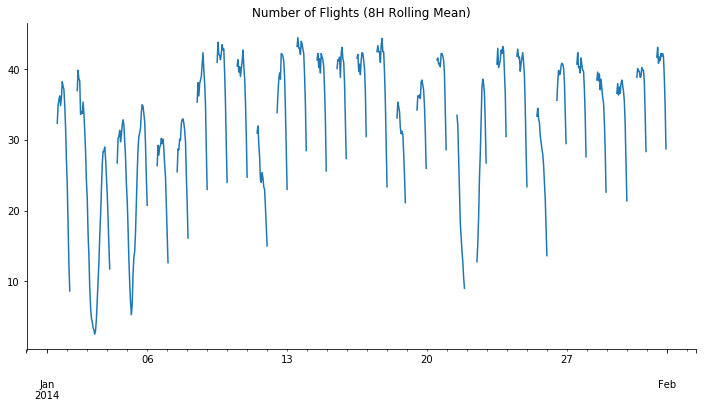

In [12]:
(flights['dep']
    .value_counts()           # value_counts returns the counts of unique values per index in the Series, so this is flights per second
    .resample('H').sum()      # Resample to flights per hour
    .rolling(8).mean()        # 8 hour rolling mean
    .plot (figsize=(12, 6),    # plot
          title="Number of Flights (8H Rolling Mean)"))
sns.despine()

And the joint distribution of departure and arrival delays:

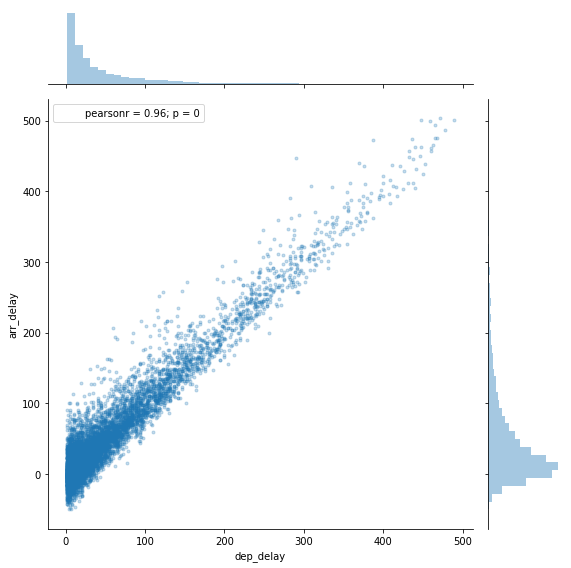

In [13]:
sns.jointplot('dep_delay', 'arr_delay',
              flights.loc[(flights['dep_delay'] > 1) &      # This notebook!
                          (flights['dep_delay'] < 500)],
              alpha=.25, marker='.', size=8);

We'll explore some of those methods and visualization techniques later.
For now we'll turn to the more fundamental operation of indexing.

By indexing, we mean selecting subsets of your data.
It's a good starting point, because it comes up in so many other places;
It's a terrible starting point because it's somewhat complicated, and somewhat boring.

## Goal of Indexing: subset the data

There are many ways you might want to specify which subset you want to select:

- Like lists, you can index by integer position.
- Like dictionaries, you can index by label.
- Like NumPy arrays, you can index by boolean masks.
- You can index with a scalar, `slice`, or array
- Any of these should work on the index (row labels), or columns of a DataFrame, or both
- And any of these should work on hierarchical indexes.

## The Basic Rules

1. Use `__getitem__` (square brackets) to select columns of a `DataFrame`

    ```python
    >>> df[['a', 'b', 'c']]
    ```

2. Use `.loc` for label-based indexing (rows and columns)

    ```python
    >>> df.loc[row_labels, column_labels]
    ```

3. Use `.iloc` for position-based indexing (rows and columns)

    ```python
    >>> df.iloc[row_positions, column_positions]
    ```

---

The arguments to `.loc` and `.iloc` are `.loc[row_indexer, column_indexer]`. An indexer can be one of

- A scalar or array (of labels or integer positions)
- A `slice` object (including `:` for everything)
- A boolean mask

The column indexer is optional.
We'll walk through all the combinations below.

Let's get a DataFrame with a labeled index by selecting the
first flight for each carrier. We'll talk about `groupby` later.

In [14]:
first = flights.groupby("unique_carrier").first()
first

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
B6,2014-01-01,20409,N318JB,115,SYR,JFK,720.00,90.00,808.00,55.00,0.00,2014-01-01 08:08:00,2014-01-01 07:20:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00
EV,2014-01-01,20366,N14977,3259,HPN,ORD,731.00,-5.00,940.00,31.00,0.00,2014-01-01 09:40:00,2014-01-01 07:31:00
F9,2014-01-01,20436,N209FR,507,LGA,DEN,"1,804.00",35.00,"2,047.00",47.00,0.00,2014-01-01 20:47:00,2014-01-01 18:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
OO,2014-01-07,20304,N732SK,6258,SYR,ORD,"1,721.00",49.00,"1,834.00",47.00,1.00,2014-01-08 18:34:00,2014-01-08 17:21:00
UA,2014-01-01,19977,N413UA,255,LGA,ORD,824.00,0.00,"1,006.00",8.00,0.00,2014-01-01 10:06:00,2014-01-01 08:24:00
US,2014-01-01,20355,N546UW,629,JFK,PHX,"1,624.00",-6.00,"1,932.00",-39.00,0.00,2014-01-01 19:32:00,2014-01-01 16:24:00


## 1. Selecting Columns with `__getitem__`

Let's select the two delay columns. Since we're *only* filtering the columns (not rows), we can use dictionary-like `[]` to do the slicing.

In [15]:
first[['dep_delay', 'arr_delay']]

,dep_delay,arr_delay
unique_carrier,,
AA,14.00,13.00
B6,90.00,55.00
DL,10.00,10.00
EV,-5.00,31.00
F9,35.00,47.00
...,...,...
OO,49.00,47.00
UA,0.00,8.00
US,-6.00,-39.00


One potential source of confusion: python uses `[]` for two purposes

1. building a list
2. slicing with `__getitem__`

In [16]:
# 1. build the list cols
cols = ['dep_delay', 'arr_delay']
# 2. slice, with cols as the argument to `__getitem__`
first[cols]

,dep_delay,arr_delay
unique_carrier,,
AA,14.00,13.00
B6,90.00,55.00
DL,10.00,10.00
EV,-5.00,31.00
F9,35.00,47.00
...,...,...
OO,49.00,47.00
UA,0.00,8.00
US,-6.00,-39.00


<div class="alert alert-success" data-title="Select Columns by Name">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Select Columns by Name</h1>
</div>
<p>Select the two airport-name columns, `'origin'` and `'dest'`, from `first`</p>

In [17]:
# Your code here...
first[['origin', 'dest']]

,origin,dest
unique_carrier,,
AA,JFK,LAX
B6,SYR,JFK
DL,LGA,ATL
EV,HPN,ORD
F9,LGA,DEN
...,...,...
OO,SYR,ORD
UA,LGA,ORD
US,JFK,PHX


## Column `.` lookup

As a convenience, pandas attaches the column names to your `DataFrame` when they're valid [python identifiers](https://docs.python.org/3/reference/lexical_analysis.html), and don't override one of the ([many](http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe)) methods on `DataFrame`

In [18]:
# Same as flights['tail_num'].value_counts()
flights.tail_num.value_counts()

N292JB    76
N258JB    69
N306JB    68
N523MQ    59
N324JB    58
          ..
N935DN     1
N619SW     1
N45440     1
N11181     1
N468WN     1
Name: tail_num, Length: 2734, dtype: int64

This is nice when working interactively, especially as tab completion works with `flights.tail_num.<TAB>`, but doesn't with `flights['tail_num'].<TAB>`.
**Still, since pandas could add methods in the future that clash with your column names, it's recommended to stick with `__getitem__` for production code.**
This will always work, even when you shadow a DataFrame method

In [19]:
x = pd.DataFrame({"mean": [1, 2, 3]})
x

,mean
0,1
1,2
2,3


In [20]:
# returns the method, not the column
x.mean

<bound method DataFrame.mean of    mean
0     1
1     2
2     3>

Finally, you can't *assign* with `.`, while you can with `__setitem__` (square brackets on the left-hand side of an `=`):

In [21]:
x.wrong = ['a', 'b', 'c']
x['right'] = ['a', 'b', 'c']
x

/home/yixian/anaconda3/envs/ph2t/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,mean,right
0,1,a
1,2,b
2,3,c


In [22]:
x.wrong

['a', 'b', 'c']

`DataFrame`s, like most python objects, allow you to attach arbitrary attributes to any instance.
This means `x.wrong = ...` attaches the thing on the right-hand side to the object on the left. But it will still check the assignment makes sense - for instance, `x['wrong']=['x', 'a']` would not have worked since Length of values does not match length of index.

## Label-Based Indexing with `.loc`

You can slice rows by label (and optionally the columns too) with `.loc`.
Let's select the rows for the carriers 'AA', 'DL', 'US', and 'WN'.

In [23]:
carriers = ['AA', 'DL', 'US', 'WN']
# Select those carriers by label
first.loc[carriers]  # no column indexer. When there is only one list, it is defaulted to be the row indexer.

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00
US,2014-01-01,20355,N546UW,629,JFK,PHX,"1,624.00",-6.00,"1,932.00",-39.00,0.00,2014-01-01 19:32:00,2014-01-01 16:24:00
WN,2014-01-01,19393,N625SW,613,ALB,BWI,"1,502.00",17.00,"1,615.00",15.00,0.00,2014-01-01 16:15:00,2014-01-01 15:02:00


Indexing both rows and columns:

In [24]:
# select just `carriers` and origin, dest, and dep_delay
first.loc[carriers, ['origin', 'dest', 'dep_delay']]

,origin,dest,dep_delay
unique_carrier,,,
AA,JFK,LAX,14.00
DL,LGA,ATL,10.00
US,JFK,PHX,-6.00
WN,ALB,BWI,17.00


Pandas will *reduce dimensionality* when possible, so slicing with a scalar on either axis will return a `Series`. On the other hand, `['tail_num']` would have yielded a `DataFrame`.

In [25]:
# select just tail_num for those `carriers`
first.loc[carriers, 'tail_num']

unique_carrier
AA    N338AA
DL    N930DL
US    N546UW
WN    N625SW
Name: tail_num, dtype: object

And scalars on both axes will return a scalar.

In [26]:
first.loc['AA', 'tail_num']

'N338AA'

## `slice` objects

You can pass a `slice` object (made with a `:`). **They make sense when your index is sorted**, which ours is.

In [27]:
# slice from AA to DL - note that this works even when the index are NOT sorted!
first.loc['AA':'DL']

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
B6,2014-01-01,20409,N318JB,115,SYR,JFK,720.00,90.00,808.00,55.00,0.00,2014-01-01 08:08:00,2014-01-01 07:20:00
DL,2014-01-01,19790,N930DL,61,LGA,ATL,"1,810.00",10.00,"2,054.00",10.00,0.00,2014-01-01 20:54:00,2014-01-01 18:10:00


Notice that the slice is inclusive on *both* sides *when using* `.loc` (`.iloc` follows the usual python semantics of closed on the left, open on the right).

<div class="alert alert-success" data-title="Index Rows and Columns">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Index Rows and Columns</h1>
</div>
<p>
Select the columns `tail_num`, `origin`, and `dest` for the carriers `US`, `VX`, and `WN` from `first`.</p>

In [28]:
# Your code here...
first.loc[['US', 'VX', 'WN'], ['tail_num', 'origin', 'dest']]

,tail_num,origin,dest
unique_carrier,,,
US,N546UW,JFK,PHX
VX,N361VA,JFK,SFO
WN,N625SW,ALB,BWI


## Boolean Indexing

Filter using a *1-dimensional* boolean array with the same length.
This is esstentially a SQL `WHERE` clause.
For example,

```sql
select * from flights
where dep_delay > 10
```

In [29]:
flights[flights.dep_delay > 10]

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
11,2014-01-01,AA,19805,N336AA,181,JFK,LAX,"1,907.00",142.00,"2,223.00",133.00,0.00,2014-01-01 22:23:00,2014-01-01 19:07:00
13,2014-01-01,AA,19805,N3HPAA,199,JFK,ORD,"1,733.00",18.00,"2,024.00",69.00,0.00,2014-01-01 20:24:00,2014-01-01 17:33:00
14,2014-01-01,AA,19805,N3HFAA,211,JFK,IAH,"1,640.00",25.00,"2,001.00",36.00,0.00,2014-01-01 20:01:00,2014-01-01 16:40:00
21,2014-01-01,AA,19805,N3KDAA,317,LGA,ORD,"1,029.00",44.00,"1,212.00",42.00,0.00,2014-01-01 12:12:00,2014-01-01 10:29:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20779,2014-01-31,UA,19977,N597UA,303,JFK,SFO,624.00,20.00,"1,026.00",40.00,0.00,2014-01-31 10:26:00,2014-01-31 06:24:00
20793,2014-01-31,UA,19977,N509UA,509,LGA,DEN,"1,740.00",12.00,"2,024.00",22.00,0.00,2014-01-31 20:24:00,2014-01-31 17:40:00
20795,2014-01-31,UA,19977,N558UA,518,LGA,DEN,"1,518.00",16.00,"1,753.00",17.00,0.00,2014-01-31 17:53:00,2014-01-31 15:18:00
20798,2014-01-31,MQ,20398,N544MQ,3199,LGA,CLT,"1,513.00",23.00,"1,702.00",12.00,0.00,2014-01-31 17:02:00,2014-01-31 15:13:00


In [30]:
mask = flights.dep_delay > 10
mask.head()

0     True
1    False
2    False
3    False
4    False
Name: dep_delay, dtype: bool

It is also possible to use boolean indexing with `.loc`.

In [32]:
flights.loc[flights.dep_delay > 10, 'fl_date']

0       2014-01-01
11      2014-01-01
13      2014-01-01
14      2014-01-01
21      2014-01-01
           ...    
20779   2014-01-31
20793   2014-01-31
20795   2014-01-31
20798   2014-01-31
20811   2014-01-31
Name: fl_date, Length: 6199, dtype: datetime64[ns]

<div class="alert alert-success" data-title="Top Airports">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Top Airports</h1>
</div>
<p>
Select all the flights departing from the 5 busiest airports</p>

In [ ]:
# Get the counts for `flights.origin`
origin_counts = flights.origin.value_counts()
origin_counts 

[`Series.value_counts`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) will return a Series where the index is the set of unique values, and the values are the number of occurrances of that value.
It's sorted in descending order, so we can get the 5 most common labels with:

In [ ]:
# Get a boolean mask for whether `counts` is in the top 5.
top5 = origin_counts.index[:5]  # how to get the first 5? How would you do it for a list?
top5

We'll test whether any given row from `filghts` is in the top 5 using the `.isin` method:

In [ ]:
mask = flights.origin.isin(top5)
mask

This is a *boolean mask*, which can be passed into `.loc` (and it makes no difference when passed into `[]`?).
We want to select the rows where `mask` is true (in the top 5) and the columns `['origin', 'dest']`.
Do we want to use `.loc` or `.iloc`? Remember, both accept boolean masks.

In [ ]:
flights.loc[mask, ['origin', 'dest']] #iloc does not seem to work since the index of the DataFrame is of integar type?

Boolean indexers are useful because so many operations can produce an array of booleans.

- missing data checks (`.isna`, `.notna`)
- container checks (`.isin`)
- boolean aggregations (`.any`, `.all`)
- comparisions (`.gt`, `.lt`, etc.)

In [ ]:
# Select rows where `dep` is null
flights.loc[flights.dep.isnull()]

<div class="alert alert-success" data-title="Boolean Indexing">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Boolean Indexing</h1>
</div>

<p>Select the rows of `flights` where the flight was cancelled (`cancelled == 1`)</p>

In [ ]:
# Your code here
flights[flights['cancelled']==1]

<div class="alert alert-success" data-title="Boolean Indexing (2)">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Boolean Indexing (2)</h1>
</div>

<p>Filter down to rows where the departure **`hour`** is before 6:00 or after 18:00.</p>

- Hint: Use the `flights.dep.dt` namespace. See the attributes [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) or use tab-completion on `flights.dep.dt.<tab>` to find an attribute giving the hour component
- Hint: NumPy and pandas use `|` for elementwise `or`, and `&` for elementwise `and` between two boolean arrays
- Hint: Be careful with [Python's order of operations](https://docs.python.org/3/reference/expressions.html#operator-precedence) between comparison operators (`<`, `>`) and NumPy's logical operators `|` and `&`. If your first attempt raises a `TypeError`, try including some parenthesis. (This has caused a lot of headaches!)

In [ ]:
# Your code here...
flights[(flights.dep.dt.hour <= 6) | (flights.dep.dt.hour <= 18)] 

## Position-Based Indexing with `.iloc`

This takes the same basic forms as `.loc`, except you use integers to designate *positions* instead of labels.

In [ ]:
first.iloc[[0, 1, 2], [1, 2]]

You can use scalars, arrays, boolean masks, or slices.
You can also use negative indicies to slice from the end like regular python lists or numpy arrays.

The one notable difference compared to label-based indexing is with `slice` objects.
Recall that **`.loc` included both ends of the slice.
`.iloc` uses the usual python behavior of slicing up to, but not including, the end point**:

In [ ]:
# select the first two rows, and the 3rd, 4th, and 5th columns
first.iloc[:2, 3:6]

## Dropping rows or columns

What if you want all items *except* for some?

```
DataFrame.drop(labels, axis=0, ...)

Parameters
----------
labels : single label or list-like
axis : int or axis name
    - 0 / 'index', look in the index.
    - 1 / 'columns', look in the columns
```

<div class="alert alert-success" data-title="Dropping Row Labels">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Dropping Row Labels</h1>
</div>
<p>Use `first.drop` to select all the rows *except* `EV` and `F9`.</p>

In [ ]:
# Your code here
first.drop(['EV', 'F9'])

<div class="alert alert-success" data-title="Drop a column">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Drop a column</h1>
</div>
<p>`flights.airline_id` is redundent with `unique_carrier`. Drop `airline_id`.</p>

In [ ]:
# your code here
flights.drop('airline_id', axis=1)

This is our first time seeing the `axis` keyword argument.
It comes up a lot in pandas and NumPy. People would say `axis='index'` (or 0) means
operate on the index (e.g. drop labels from the index).
`axis='columns'` (or 1) means operate on the columns. But I always get confused about which way it is - the best way is to test its behavior before using.

## Special Case: `DateTimeIndex`

> Easier slicing with strings

Pandas has really good support for time series data, including a few conveniences to make indexing easier.
First let's get a DataFrame with a `DatetimeIndex`, another specialied index type like we saw with `RangeIndex`.

In [ ]:
flights.resample("H", on="arr")[['dep_delay', 'arr_delay']]

In [ ]:
# We'll talk about resample later
# This gets the average delays per hour
delays = flights.resample("H", on="arr")[['dep_delay', 'arr_delay']].mean()
delays.head()

`delays` has a `DatetimeIndex`:

In [ ]:
delays.index

In [ ]:
delays.plot();

Since `delays.index` is a `DatetimeIndex`, we can use [partial string indexing](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#datetimeindex-partial-string-indexing) to easily select subsets of the data.
The basic idea is to specify the datetime up to whatever resolution you care about.
For example, to select all the flights on the 12th (a daily resolution):

In [ ]:
delays.loc['2014-01-12']

Without parital string indexing, you'd need to do something like

In [ ]:
delays[(delays.index.year == 2014) & (delays.index.month == 1) & (delays.index.day == 12)]

Which isn't very fun.

<div class="alert alert-success" data-title="Datetime Indexing">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise: Datetime Indexing</h1>
</div>
<p>
Slice `delays` to select all rows from 12:00 on January 3rd, to 12:00 on the 10th.</p>

In [ ]:
# Your code
# delays.loc["2014-01-03 12:00:00":"2014-01-10 12:00:00"]
delays.loc['2014-01-03T12':'2014-01-10T12']

<div class="alert alert-success" data-title="Thought Exercise">
  <h1><i class="fa fa-lightbulb-o" aria-hidden="true"></i> Thought Exercise</h1>
</div>
<p>
Why does pandas use a property like `.loc[..., ...]`, rather than a method like `.loc(..., ...)`?</p>

- Hint: Where in the language can you use `foo.loc[...]`, but not `foo.loc(...)`?

In [ ]:
# Answer: when we are trying to do assigning.
first.loc['AA', 'fl_num'] = -1
first.head()

## Summary

- Introducted to `DataFrame` (2-D tabel) and `Series` (1-D array)
- Both have *row labels*, `DataFrame` also has `column labels`
- Saw `.loc` for labeled indexing and `.iloc` for positional indexing
- `.loc`, `.iloc`, and `__getitem__` all accept boolean masks too

## Additional Exercises

Some additional exercises focused on indexing:

In [ ]:
from IPython.display import IFrame

IFrame("http://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Auto.html", 750, 900)

In [ ]:
url = "http://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Auto.csv"
cars = pd.read_csv(url, index_col=0)

In [ ]:
cars.head()

In [ ]:
yearly = cars.groupby("year").mean()
yearly.head()

 <div class="alert alert-success" data-title="">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>
<p>
Select the engine-related columns (cylinders, displacement, horsepower) from `cars`.
</p>

In [ ]:
cars[['cylinders', 'displacement', 'horsepower']]

 <div class="alert alert-success" data-title="">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>
<p>
Select every 5th row of `cars`.
</p>

Hint: See [here](http://stackoverflow.com/a/509295) for all the options on slicing.

In [ ]:
cars.iloc[::5]

 <div class="alert alert-success" data-title="">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>

<p>Select years `70`, `75`, `80`, and `82` and columns `horsepower` and `weight` from `yearly`.</p>

In [ ]:
yearly.loc[[70, 75, 80, 82], ['horsepower', 'weight']]

 <div class="alert alert-success" data-title="">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>

<p>Select rows in `cars` with at least 30 MPG.</p>

In [ ]:
cars[cars["mpg"] > 30]

 <div class="alert alert-success" data-title="">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>

<p>How many cars have at least 30 MPG and at least 5 cylinders?</p>

In [ ]:
len(cars[(cars.mpg >= 30) & (cars.cylinders >= 5)])